<a href="https://colab.research.google.com/github/gabrielsomulo/Projetos-Alura/blob/main/Ciencia_de_dados_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
url = 'https://raw.githubusercontent.com/alura-cursos/numpy/dados/apples_ts.csv'

In [6]:
url2 = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'

In [7]:
dado = np.loadtxt(url, delimiter=',', usecols=np.arange(1, 88, 1))

In [8]:
dado2 = np.loadtxt(url2, delimiter=',', usecols=np.arange(1,6,1), skiprows=1)

In [9]:
#dado.ndim

In [10]:
#dado.size

In [11]:
#dado.shape

In [12]:
#dado.T

In [13]:
dado_transposto = dado.T

In [14]:
#dado_transposto

In [15]:
datas = dado_transposto[:, 0]

In [16]:
precos = dado_transposto[:, 1:6]

In [17]:
datas = np.arange(1,88,1)

In [18]:
Moscow = precos[:,0]
Kaliningrad = precos[:,1]
Petersburg = precos[:,2]
Krasnodar = precos[:,3]
Ekaterinburg = precos[:,4]

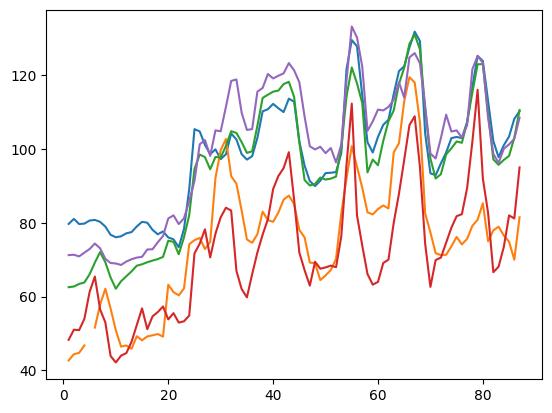

In [19]:
plt.plot(datas, Moscow)
plt.plot(datas, Kaliningrad)
plt.plot(datas, Petersburg)
plt.plot(datas, Krasnodar)
plt.plot(datas, Ekaterinburg)

In [20]:
Moscow.shape

(87,)

In [21]:
Moscow_ano1 = Moscow[0:12]
Moscow_ano2 = Moscow[12:24]
Moscow_ano3 = Moscow[24:36]
Moscow_ano4 = Moscow[36:48]


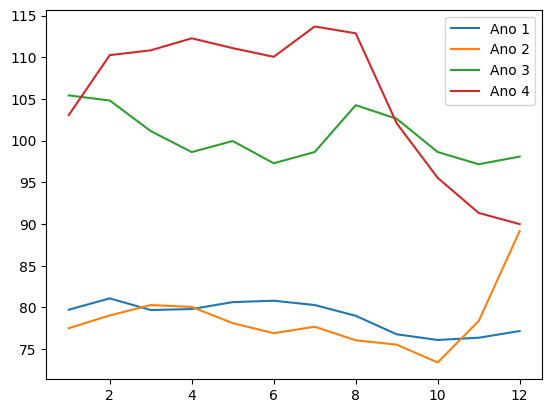

In [22]:
plt.plot(np.arange(1,13,1), Moscow_ano1)
plt.plot(np.arange(1,13,1), Moscow_ano2)
plt.plot(np.arange(1,13,1), Moscow_ano3)
plt.plot(np.arange(1,13,1), Moscow_ano4)

plt.legend(['Ano 1', 'Ano 2', 'Ano 3', 'Ano 4'])

In [23]:
np.array_equal(Moscow_ano1, Moscow_ano2)

False

In [24]:
np.allclose(Moscow_ano1, Moscow_ano4,0.1)

False

# Avaliação da qualidade do corte de dados com tentativa e erro

np.float64(110.48504740461489)

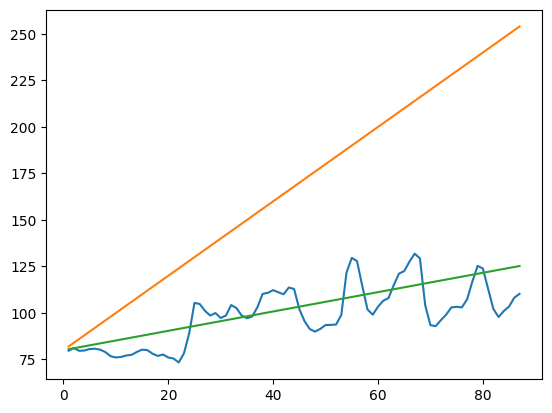

In [25]:
plt.plot(datas, Moscow)
x = datas
#Suposição de uma reta para cortar os dados
y = 2*x+80
plt.plot(x,y)


#Quanto menor o resultado melhor o corte

#Fórmula de avaliação de  qualidade -> np.sqrt(np.sum(np.power(base-y,2)))
np.sqrt(np.sum(np.power(Moscow-y,2)))
#Outra forma de avaliar
np.linalg

#Segunda suposição para a seleção
y = 0.52*x+80
plt.plot(x,y)
np.linalg.norm(Moscow-y)


In [26]:
a = [1,2,3]

#Criar uma cópia que sempre segue os valores da versão original
b = a

#Criar uma cópia que pode ser modificada de maneira independente
b = np.copy(a)



# Avaliação da qualidade do corte de dados de forma automatizada

## Coeficiente angular

a = CA

n = número de elementos

Y = valores do eixo Y (Moscow)

X = valores do eixo X (datas)


-----------------------------------

a = (n*Soma(Xi*Yi) - Soma(Xi)* Soma(Yi)) / (n*Soma(Xi^2) - (Soma(Xi))^2

In [27]:
n = np.size(Moscow)
Y = Moscow
X = datas

coeficiente_angular = ((n*np.sum(X*Y)) - (np.sum(X)*np.sum(Y))) / (n*np.sum(np.power(X,2)) - np.power(np.sum(X), 2))

## Coeficiente Linear

b = CL

a = CA

-------------------------------------

b = Media(Y) - a*Media(X)

In [82]:
coeficiente_linear = np.mean(Y) - coeficiente_angular*np.mean(X)

coeficiente_angular

np.float64(0.43520212145512926)

## Definição correta da reta

-------------------------------------

Y = a*X + b

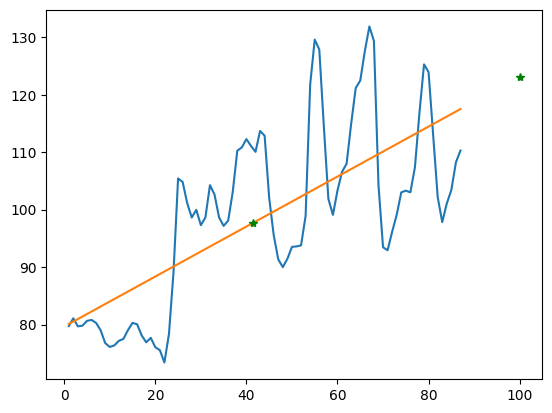

In [74]:
y = coeficiente_angular*X + coeficiente_linear

np.linalg.norm(Moscow-y)

plt.plot(datas, Moscow)
plt.plot(X, y)

plt.plot(41.5, 41.5*coeficiente_angular+coeficiente_linear, '*g')

plt.plot(100, 100*coeficiente_angular+coeficiente_linear, '*g')


In [129]:
#np.random.randint(low=40, high=100, size=100)
np.random.seed(84)

coeficientes_angulares = np.random.uniform(low=0.10, high=0.90, size=100)

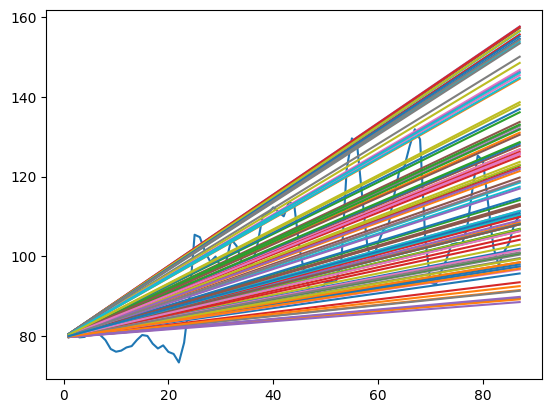

In [128]:
norma = np.array([])
valores_y = [np.array([]) for i in range(100)]

for i in range(100):
  norma = np.append(norma, np.linalg.norm(Moscow-(coeficientes_angulares[i]*X+coeficiente_linear)))

  y_array = coeficientes_angulares[i]*X+coeficiente_linear
  valores_y[i] = y_array

plt.plot(datas, Moscow)
for y in range(100):
  plt.plot(X, valores_y[y])

In [126]:
informacoes_agregadas = np.column_stack([norma, coeficientes_angulares])

np.savetxt('informacoes_dados.csv', informacoes_agregadas, delimiter=',')

# **Exercício 1**

In [30]:
dado2.T

array([[  2.96,   3.91,   4.42, ...,  15.59,  15.92,  16.45],
       [ 86.76,  88.05,  95.17, ..., 256.5 , 260.14, 261.51],
       [172.  , 166.  , 156.  , ..., 168.  , 142.  , 152.  ],
       [ 85.  ,  78.  ,  81.  , ...,  82.  ,  72.  ,  74.  ],
       [  2.  ,   3.  ,   2.  , ...,  20.  ,  11.  ,   2.  ]])

In [31]:
dado2_transposto = dado2.T

In [32]:
laranjas = dado2_transposto[0:2, :5000]
toranjas = dado2_transposto[0:2, 5000:]

In [33]:
laranjas_peso = laranjas[0, :]
toranjas_peso = toranjas[0, :]

In [34]:
laranjas_diametro = laranjas[1, :]
toranjas_diametro = toranjas[1, :]

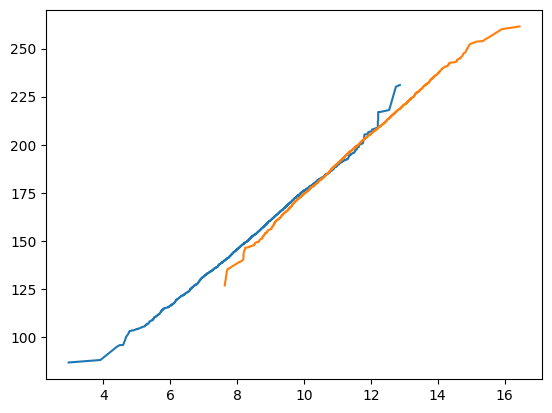

In [35]:
plt.plot(laranjas_peso, laranjas_diametro)
plt.plot(toranjas_peso, toranjas_diametro)

In [36]:
diametro_laranja = dado2[:5000,0]
diametro_toranja = dado2[5000:,0]
peso_laranja = dado2[:5000,1]
peso_toranja = dado2[5000:,1]


In [37]:
n1 = np.size(peso_laranja)
Y1 = peso_laranja
X1 = diametro_laranja

coeficiente_angular_L = ((n1*np.sum(X1*Y1)) - (np.sum(X1)*np.sum(Y1))) / (n1*np.sum(np.power(X1,2)) - np.power(np.sum(X1), 2))


n2 = np.size(peso_toranja)
Y2 = peso_toranja
X2 = diametro_toranja

coeficiente_angular_T = ((n2*np.sum(X2*Y2)) - (np.sum(X2)*np.sum(Y2))) / (n2*np.sum(np.power(X2,2)) - np.power(np.sum(X2), 2))

In [38]:
coeficiente_linear_L = np.mean(Y1) - coeficiente_angular_L*np.mean(X1)

coeficiente_linear_T = np.mean(Y2) - coeficiente_angular_T*np.mean(X2)

In [39]:
y_L = coeficiente_angular_L*X1 + coeficiente_linear_L

y_T = coeficiente_angular_T*X2 + coeficiente_linear_T

np.linalg.norm(peso_laranja-y_L)

np.linalg.norm(peso_toranja-y_T)

np.float64(44.60533206058902)

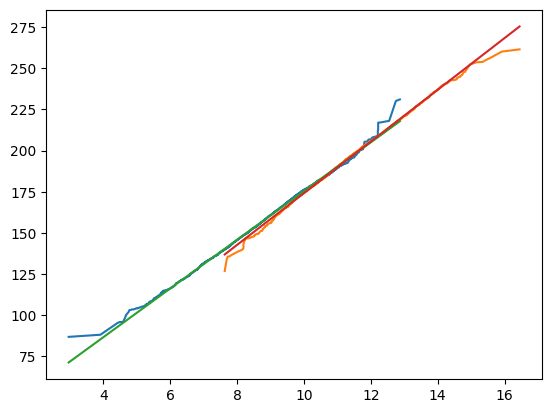

In [40]:
plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.plot(X1, y_L)
plt.plot(X2, y_T)

#**Exercício 2**


/tmp/ipython-input-1023907719.py:8: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(1 - x**2)
/tmp/ipython-input-1023907719.py:9: RuntimeWarning: invalid value encountered in sqrt
  y2 = -np.sqrt(1 - x**2)


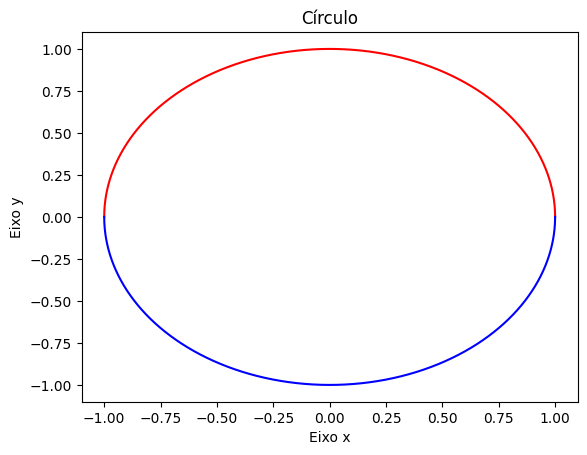

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar uma sequência de valores de x de -1 a 1
x = np.arange(-1, 1.01, 0.0001)

# Implementação da fórmula
y1 = np.sqrt(1 - x**2)
y2 = -np.sqrt(1 - x**2)

# Plotar o gráfico com as duas partes do círculo
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b' )

# Adicionar o título do gráfico e os rótulos dos eixos x e y
plt.title("Círculo")
plt.xlabel("Eixo x")
plt.ylabel("Eixo y")

# Exibir o gráfico
plt.show()